
# Project: TMDb Movie Data Analysis

## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains (before performing analysis) 10866 rows and 21 columns.
     It consists of the following columns:
id                      (Shows the movie's ID),
imdb_id                 (Shows the movie's IMDB ID),
popularity              (Shows how popular the movie is),
budget                  (Shows the budget of the movie),
revenue                 (Shows the revenue of the movie),
original_title          (Shows the original title of the movie),
cast                    (Shows the movie casts),
homepage                (Shows the movie homepage),
director                (Shows the name of the movie director(s)),
tagline                 (Shows the movie tagline),
keywords                (Shows notable keywords),
overview                (Shows the overview of the movie),
runtime                 (Shows the movie runtime),
genres                  (Shows the list of the movie genres separated accordingly),
production_companies    (Shows the list of the various movie production companies), 
release_date            (Shows the movie release date),
vote_count              (Shows the vote count of the movie),
vote_average            (Shows the vote count average of the movie),
release_year            (Shows movie release year),
budget_adj              (Shows movie budget adjustment),
revenue_adj             (Shows movie revenue adjustment).

<a id='questions'></a>
## Questions
1. Which year had the most and least released movies?
2. What vote count had the highest number in terms of movies under its category?
3. Which movie genre was mostly released across the years?
4. How many movie entries had the most occurring budget?
5. Name the movies that make up the most reoccurring non-zero revenue returns
6. What number of movies had the most occurring runtime?
7. What does the plot of runtime and popularity show?
8. What relationship does the plot of vote_count and vote_average depict?

In [99]:
# Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Inspection
Here, a brief inspection of the dataset is carried out in order to determine the next line of action to take.

In [100]:
# Loading dataset
tmdb_movies = pd.read_csv('tmdb-movies.csv')

In [101]:
# Carrying out initial checks - 1
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [102]:
# Carrying out initial checks - 2
tmdb_movies.head(3)      # should display the first three rows of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [103]:
# Carrying out initial checks - 3
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [104]:
# Carrying out initial checks - 4
tmdb_movies.shape

(10866, 21)


### Data Cleaning

Here, the dataset is cleaned. 

In [105]:
# Checking for duplicates - just in case there are any
tmdb_movies.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [106]:
# Dropping duplicate rows
tmdb_movies.drop_duplicates(inplace=True)

In [107]:
# Re-hecking for duplicates - just in case there are any
tmdb_movies.duplicated()        # One duplicate row dropped

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10865, dtype: bool

In [108]:
# Confirming that there are no duplicates
tmdb_movies.duplicated().sum()

0

In [109]:
# Dropping columns not really needed as they had null values and as well would not be used in the analysis
tmdb_movies.drop(['cast', 'homepage', 'director', 'tagline', 'production_companies', 'budget_adj', 'revenue_adj', 'keywords', 
        'overview'], axis=1, inplace=True)

In [110]:
# Dropping null rows of the 'genres' column 
tmdb_movies.dropna(inplace=True)

In [111]:
# Dropping all '0' values in the 'budget' column
tmdb_movies = tmdb_movies[tmdb_movies.budget !=0]

In [112]:
# Counting each value of the budget column to see if '0'values are there
tmdb_movies.budget.value_counts()

20000000    190
15000000    183
25000000    178
10000000    176
30000000    164
           ... 
40000         1
28            1
68            1
3500159       1
19000         1
Name: budget, Length: 555, dtype: int64

In [113]:
# Confirming that null rows ('genres' column) and rows with zero budget have been dropped
tmdb_movies.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5167 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5167 non-null   int64  
 1   imdb_id         5167 non-null   object 
 2   popularity      5167 non-null   float64
 3   budget          5167 non-null   int64  
 4   revenue         5167 non-null   int64  
 5   original_title  5167 non-null   object 
 6   runtime         5167 non-null   int64  
 7   genres          5167 non-null   object 
 8   release_date    5167 non-null   object 
 9   vote_count      5167 non-null   int64  
 10  vote_average    5167 non-null   float64
 11  release_year    5167 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 524.8+ KB


In [114]:
# Looking up the first five rows of the newly cleaned dataset
tmdb_movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

Here, relevant manipulation/computation of the cleaned dataset are made and with supporting visualizations as well. The end goal being to answer the posed questions.

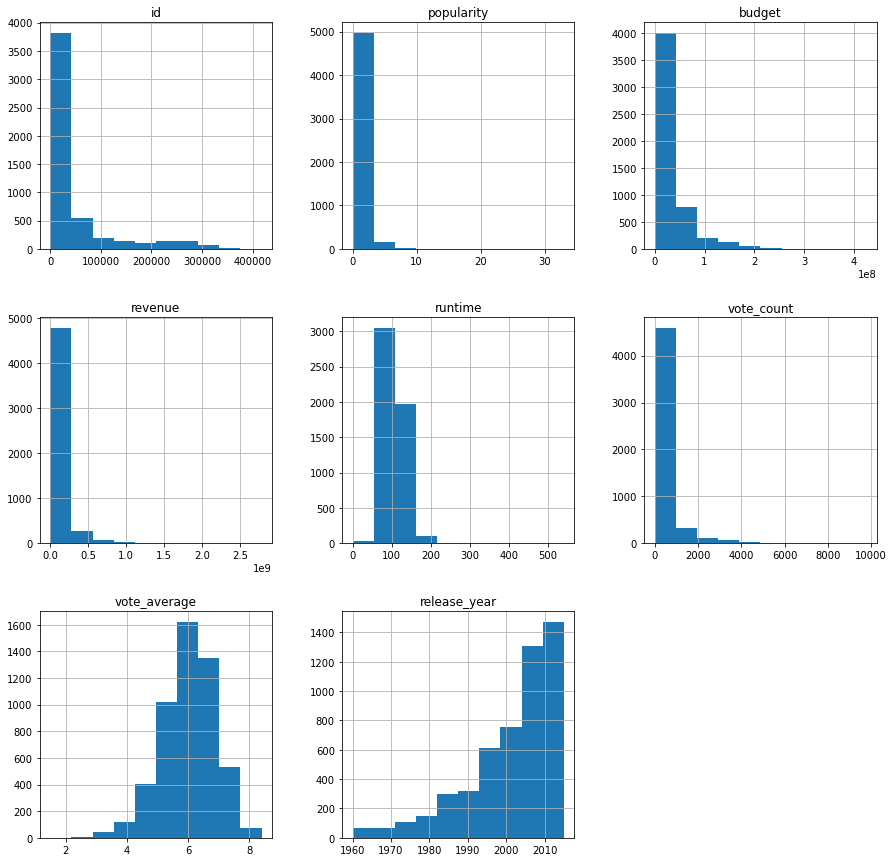

In [115]:
# Plotting the graphs of some of the columns of the dataset to get a visual picture of them 
tmdb_movies.hist(figsize=(15,15));

### Research Question 1: Which year had the most and least released movies?

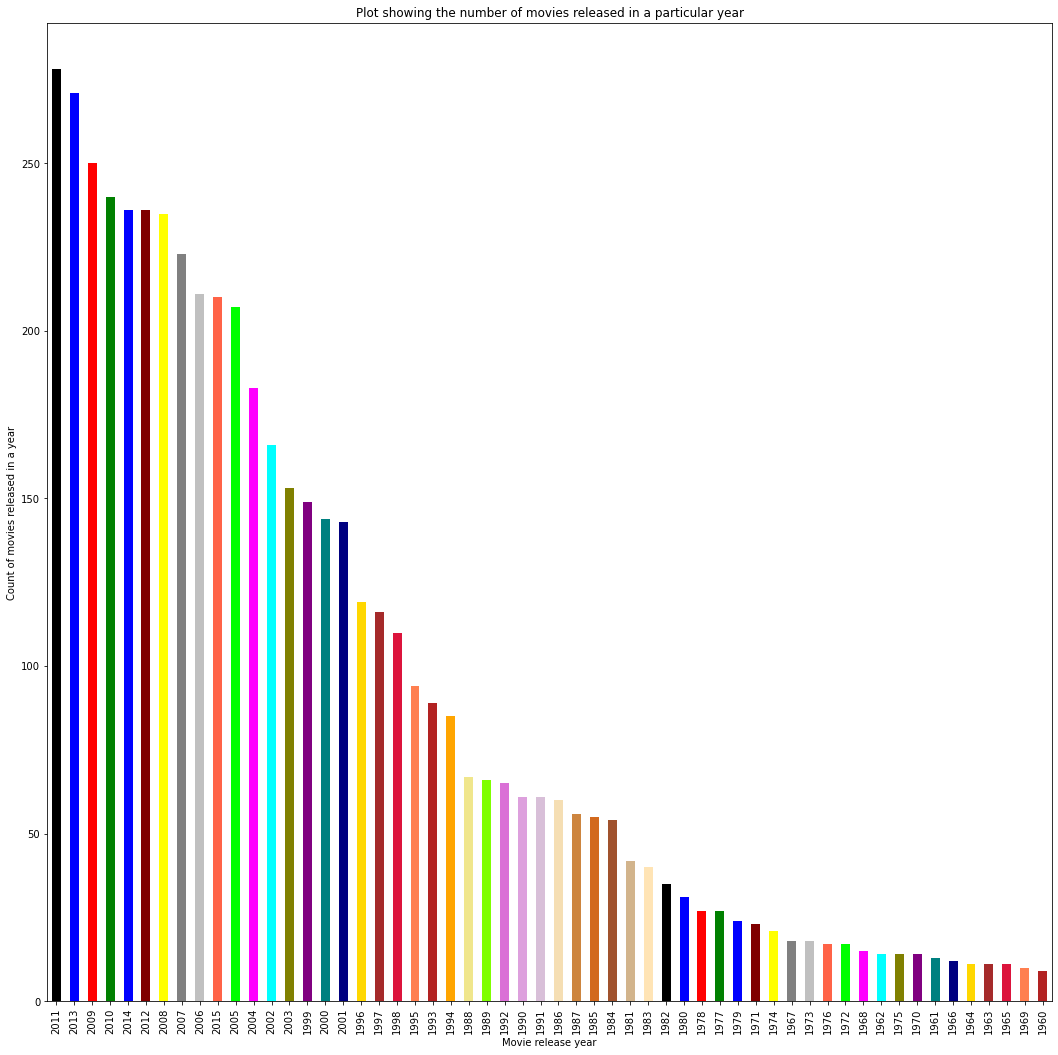

In [116]:
# Plot of release_year
# Different colours were assigned to each year's bar
tmdb_movies['release_year'].value_counts().plot(kind='bar', figsize=(18,18), color=['black', 'blue', 'red', 'green', 'blue', 
    'maroon', 'yellow', 'gray', 'silver', 'tomato', 'lime', 'magenta', 'cyan', 'olive', 'purple', 'teal', 'navy', 'gold',
    'brown', 'crimson', 'coral', 'firebrick', 'orange', 'khaki', 'chartreuse', 'orchid','plum', 'thistle', 'wheat', 'peru',
    'chocolate', 'sienna', 'tan', 'moccasin'], title='Plot showing the number of movies released in a particular year',
     xlabel='Movie release year', ylabel='Count of movies released in a year');  


#### Research Question 1: Findings

The year movies were released mostly was in 2011 while the year with the least number of released movies is 1960.






### Research Question 2: What vote count had the highest number in terms of movies under its category?

In [117]:
# Summing the number of each vote_count
tmdb_movies['vote_count'].value_counts()

10     91
11     86
12     83
13     73
16     70
       ..
907     1
539     1
599     1
794     1
464     1
Name: vote_count, Length: 1280, dtype: int64

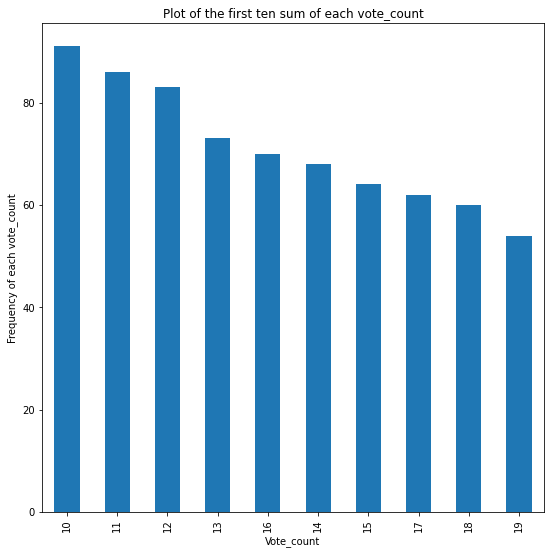

In [118]:
# Defining a function that will be used in plotting
def graph_plots(**kwargs):
    return tmdb_movies[kwargs['x']].value_counts().head(10).plot(xlabel=kwargs['xlabel'], ylabel=kwargs['ylabel'],
                       title=kwargs['title'], kind=kwargs['kind'], figsize=(9,9))   

graph_plots(x = 'vote_count', title = 'Plot of the first ten sum of each vote_count',
            xlabel = 'Vote_count', ylabel = 'Frequency of each vote_count', 
            kind = 'bar'); # Plots the first ten sum of each vote_count                                                                               

In [119]:
# Grouping by the highest 'vote_count' number
highest_votecount_number = tmdb_movies.groupby('vote_count')
highest_votecount_number = highest_votecount_number.get_group(10)
print(highest_votecount_number)          # Prints the sum of the highest 'vote_count' number

           id    imdb_id  popularity    budget   revenue  \
1093   230779  tt1621046    0.221957  10000000         0   
1120   279914  tt2326574    0.376205  12000000         0   
1211   287935  tt2390283    0.112646  18000000         0   
1560    29483  tt1209377    0.534927   4300000         0   
1592    28677  tt1276107    0.470640   6300000         0   
...       ...        ...         ...       ...       ...   
10578   26555  tt0090856    0.167621  15000000  12308521   
10647   28110  tt0069976    0.066994   1000000   2000000   
10684   33157  tt0066549    0.092150  25000000         0   
10705   36583  tt0059549    0.225062       115         0   
10802   54000  tt0077539    0.227338   6727000         0   

                           original_title  runtime  \
1093                         Cesar Chavez      102   
1120                        The Identical      107   
1211                         Midnight Sun      120   
1560                       Beautiful Kate       90   
1592   Wi

#### Research Question 2: Findings

The vote_count that had the highest number of movie count under it is '10'.






### Research Question 3: Which movie genre was mostly released across the years?

In [120]:
# Summing the number of movie 'genres'
tmdb_movies['genres'].value_counts()

Drama                                   317
Comedy                                  292
Drama|Romance                           147
Horror|Thriller                         134
Comedy|Romance                          131
                                       ... 
Drama|Western|War|Romance                 1
Adventure|Drama|Fantasy|Horror            1
Drama|Thriller|Crime|Mystery|Romance      1
Horror|Thriller|Mystery|Fantasy           1
Comedy|Family|Mystery|Romance             1
Name: genres, Length: 1288, dtype: int64

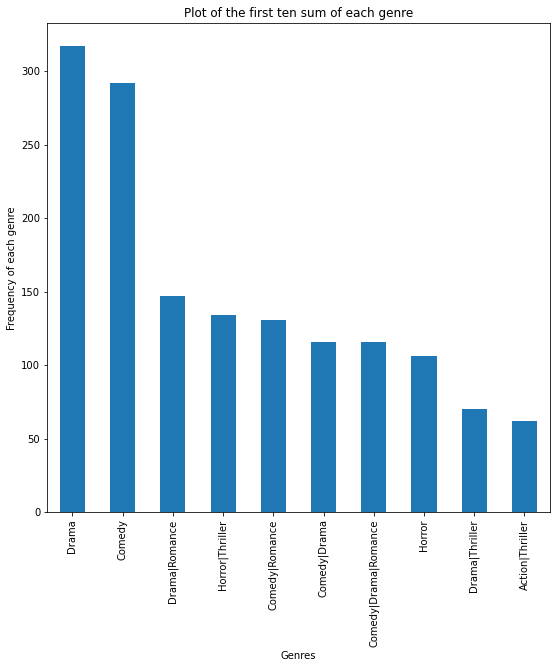

In [121]:
# Plotting the sum of the first ten movie genre
graph_plots(x = 'genres', title = 'Plot of the first ten sum of each genre',
            xlabel = 'Genres', ylabel = 'Frequency of each genre', 
            kind = 'bar');   

In [122]:
# Grouping by the movie 'genres'
most_occurring_genre = tmdb_movies.groupby('genres')
most_occurring_genre = most_occurring_genre.get_group('Drama')
print(most_occurring_genre)          # Prints the most occurring 'genre'

           id    imdb_id  popularity    budget    revenue  \
55     295964  tt2503944    2.584264  20000000   36606743   
58     306819  tt0810819    2.557859  15000000   64191523   
68     312221  tt3076658    2.331567  35000000  137935567   
77     321741  tt3322364    2.121884  35000000   48623572   
96     298382  tt2910904    1.823130  11930000   18340000   
...       ...        ...         ...       ...        ...   
10538     383  tt0089537    0.350539     22500          0   
10727    3116  tt0064665    0.859806   3600000   44785053   
10800   18387  tt0077235    0.177276  11000000          0   
10822     396  tt0061184    0.670274   7500000   33736689   
10824    2525  tt0060164    0.533292  18000000          0   

                        original_title  runtime genres release_date  \
55                               Burnt      100  Drama      10/2/15   
58                     The Danish Girl      120  Drama     11/27/15   
68                               Creed      133  Drama

#### Research Question 3: Findings

The movie genre (Drama) was mostly released across the years.






### Research Question 4: How many movie entries had the most occurring budget?

In [123]:
# Summing by movie budget
tmdb_movies['budget'].value_counts()

20000000    190
15000000    183
25000000    178
10000000    176
30000000    164
           ... 
40000         1
28            1
68            1
3500159       1
19000         1
Name: budget, Length: 555, dtype: int64

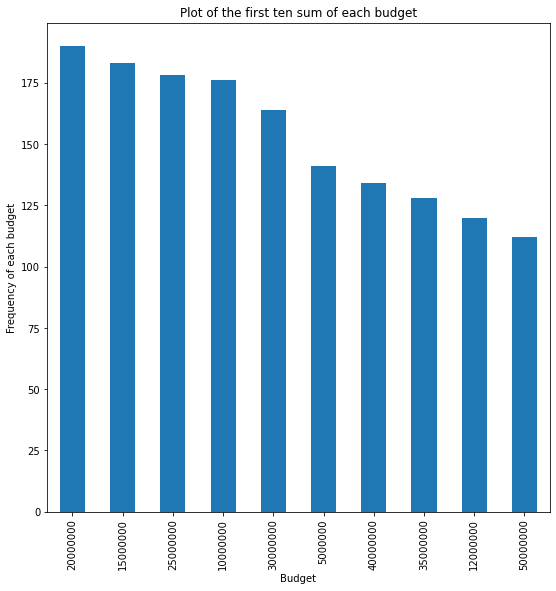

In [124]:
# Plotting the first ten sum of each budget
graph_plots(x = 'budget', title = 'Plot of the first ten sum of each budget',
            xlabel = 'Budget', ylabel = 'Frequency of each budget', 
            kind = 'bar'); 

#### Research Question 4: Findings

A total of 190 movies had a budget of 20,000,000 each.






### Research Question 5: Name the movies that make up the most reoccurring non-zero revenue returns

In [125]:
# Summing by movie revenue
tmdb_movies['revenue'].value_counts()

0           1313
12000000       7
2000000        5
5000000        5
11000000       5
            ... 
5728213        1
253899         1
10126458       1
672648         1
33736689       1
Name: revenue, Length: 3754, dtype: int64

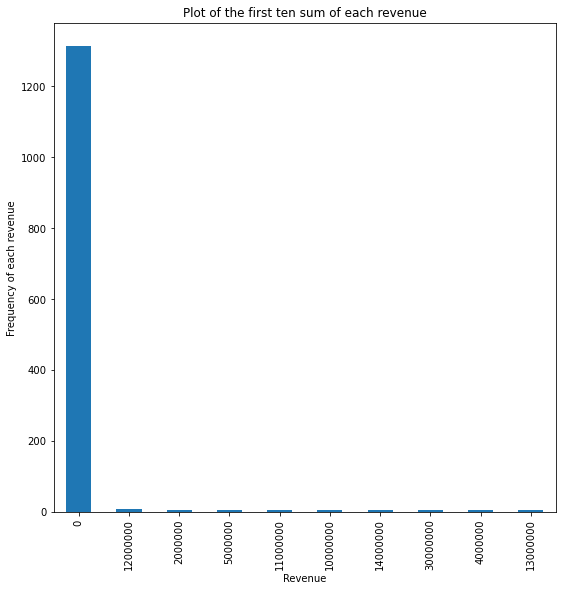

In [126]:
# Plotting the first ten sum of each revenue value
graph_plots(x = 'revenue', title = 'Plot of the first ten sum of each revenue',
            xlabel = 'Revenue', ylabel = 'Frequency of each revenue', 
            kind = 'bar'); 

In [127]:
# Grouping by the most reoccurring 'revenue'
most_reoccurring_revenue = tmdb_movies.groupby('revenue')
most_reoccurring_revenue = most_reoccurring_revenue.get_group(12000000.0)
print(most_reoccurring_revenue)             # Prints the most reoccurring 'revenue'

          id    imdb_id  popularity    budget   revenue  \
1364   38985  tt0076740    0.219941  22000000  12000000   
2591   47288  tt0160429    0.173433  25000000  12000000   
2766    7501  tt0211465    0.379856  15000000  12000000   
8410   11644  tt0082085    0.308408  18000000  12000000   
9905   14703  tt0058404    0.182922   3000000  12000000   
10716   2428  tt0059245    0.146033  20000000  12000000   
10848   2161  tt0060397    0.207257   5115000  12000000   

                     original_title  runtime                     genres  \
1364                       Sorcerer      121  Action|Thriller|Adventure   
2591                 The King and I       87     Animation|Drama|Family   
2766               Knockaround Guys       92             Crime|Thriller   
8410                       Blow Out      108     Drama|Mystery|Thriller   
9905        The Night of the Iguana      125              Drama|Romance   
10716  The Greatest Story Ever Told      199              Drama|History   
10

#### Research Question 5: Findings

List of movies having the highest revenue returns are:

Sorcerer     
The King and I         
Knockaround Guys           
Blow Out         
The Night of the Iguana        
The Greatest Story Ever Told        
Fantastic Voyage 






### Research Question 6: What number of movies had the most occurring runtime?

In [128]:
# Summing by movie 'runtime'
tmdb_movies['runtime'].value_counts()

90     184
100    167
97     154
93     150
95     149
      ... 
7        1
352      1
15       1
213      1
199      1
Name: runtime, Length: 171, dtype: int64

In [129]:
# Grouping by movie 'runtime'
most_movies_runtime = tmdb_movies.groupby('runtime')
most_movies_runtime = most_movies_runtime.get_group(90)
print(most_movies_runtime)          # Prints the most occurring movie 'runtime'

           id    imdb_id  popularity    budget   revenue  \
144    291270  tt2401878    1.125239   8000000   3759286   
194    354110  tt2271563    0.747541  11000000         0   
229    239573  tt2358925    0.577814  35000000  14431253   
256    240483  tt2145829    0.486351  21000000         0   
309    329540  tt3528666    0.394466   1950000         0   
...       ...        ...         ...       ...       ...   
9828    27085  tt0073260    0.289443   1500000         0   
9939      839  tt0067023    0.462681    450000         0   
10079   28090  tt0100107    0.197490   4000000         0   
10547   37032  tt0091607    0.311655  10000000         0   
10855   13343  tt0059221    0.141026    700000         0   

                    original_title  runtime  \
144                      Anomalisa       90   
194                       Forsaken       90   
229            Unfinished Business       90   
256                Robot Overlords       90   
309    The Marine 4: Moving Target       90 

#### Research Question 6: Findings

A total of 184 movies had a runtime of 90 (1hour 30 minutes).

### Research Question 7: What does the plot of runtime and popularity show?

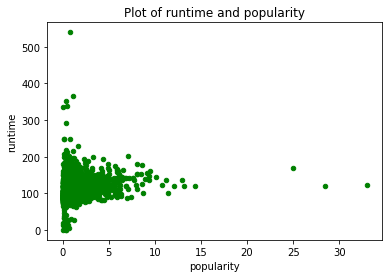

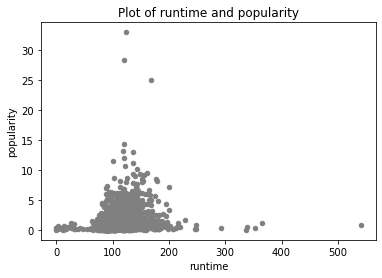

In [130]:
# plot of runtime and popularity alternated differently
tmdb_movies.plot(x='popularity', y='runtime', kind='scatter', color='green', 
         title='Plot of runtime and popularity');        # First instance of plot


tmdb_movies.plot(x='runtime', y='popularity', kind='scatter', color='gray', 
         title='Plot of runtime and popularity');        # Second instance of plot

#### Research Question 7: Findings

Plot of runtime and popularity shows that most of the movies having runtime between 0-200 minutes had higher popularity than those of other runtime range(s).




### Research Question 8: What relationship does the plot of vote_count and vote_average depict?

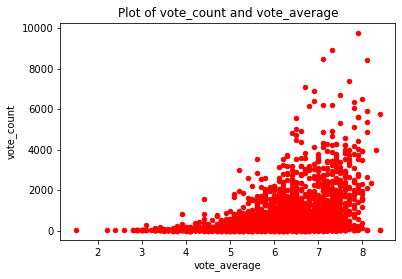

In [131]:
# plot of vote_average and vote_count
tmdb_movies.plot(x='vote_average', y='vote_count', title = 'Plot of vote_count and vote_average', kind='scatter', color='red');

#### Research Question 8: Findings

The plot of vote_count and vote_average shows that the distribution is negatively skewed (that is, left skewed). Meaning, most of the data are concentrated on the right side of the plot (most of the vote_count had a high average).

<a id='conclusions'></a>
## Conclusions

The dataset before analysis was fairly cleaned. As such only a few cleaning was done on it. The dataset shows that movies were mostly released in 2011 with the least number released in 1960. Most of the movies had a vote count of 10 and as well, most of the movies released were drama. Further analysis of the dataset shows that a good number of the movies were produced on a budget of 20 million each. About seven of the movies made a revenue of 12 million each. In terms of highest runtime, about 184 movies had a runtime of 90 minutes. Other plots of the analysis shows that most of the movies with higher popularity had runtime between 0-200 minutes. And the vote average of the vote count of most of the movies were on a high side.
    Further research would help address: the null value cases of the genres column, the zero values in the budget column (a budget cannot be zero), the zero values in the revenue column amongst others. 

<a id='limitations'></a>
## Limitations

The analysis of the dataset was done after it was cleaned further. Thus, in the cleaning approach executed (such as the removal of the null rows of the genres column and the zero values of the budget column) some valuable information of other columns of the dataset not having either null or zero values may have been dropped. It therefore impacted on the nature of answers gotten from the various questions raised.

<a id='references'></a>
## References

[1]     

https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/#:~:text=Pandas%20has%20a%20tight%20integration,argument%20of%20the%20plot%20function

[2]

https://www.rapidtables.com/web/color/RGB_Color.html#color-table

[3]

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

[4]

https://www.adamsmith.haus/python/answers/how-to-get-a-group-from-a-pandas-groupby-object-in-python

[5]

https://dfrieds.com/data-analysis/value-counts-python-pandas.html

[6]

https://www.codegrepper.com/code-examples/python/how+to+increase+the+size+of+scatter+plot+in+python

[7]

https://corporatefinanceinstitute.com/resources/knowledge/other/negatively-skewed-distribution/#:~:text=In%20statistics%2C%20a%20negatively%20skewed,the%20distribution%20graph%20is%20longer

[8]

https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0000/modules/306f0239-bb80-45c6-bf45-37ee745a63d6/lessons/ls0526/concepts/f41d3e13-9bbc-45a7-8e7e-14f9e5ba1607

[9]

https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

[10]

https://stackoverflow.com/questions/63650646/add-labels-and-title-to-a-plot-made-using-pandas

[11]

https://www.kaggle.com/code/residentmario/univariate-plotting-with-pandas/notebook

[12]

https://www.freecodecamp.org/news/args-and-kwargs-in-python/#:~:text=**kwargs%20allows%20us%20to,denote%20this%20type%20of%20argument.
